
## Case-study 1->Play Tennis ( K Nearest Neighbour Classifier)

### To predict if we can play tennis or not given the weather conditions

### 1.1 Load the libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1.2 Read the dataset(PlayTennis.csv):

In [2]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\PlayTennis.csv')
dfy

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [3]:
#Use label encode to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlook']=le.fit_transform(df['Outlook'])
df['Temperature']=le.fit_transform(df['Temperature'])
df['Humidity']=le.fit_transform(df['Humidity'])
df['Wind']=le.fit_transform(df['Wind'])
df['Play Tennis']=le.fit_transform(df['Play Tennis'])
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [4]:
#Extract the independent variable X and dependent variable y.
X=df.drop('Play Tennis',axis=1)
y=df['Play Tennis']

### 1.5 Visualize the data:(countplot)

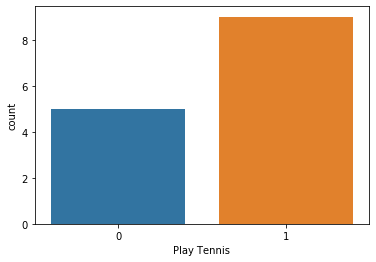

In [5]:
# Visualize the data using countplot
sns.countplot('Play Tennis',data=df)
plt.show()

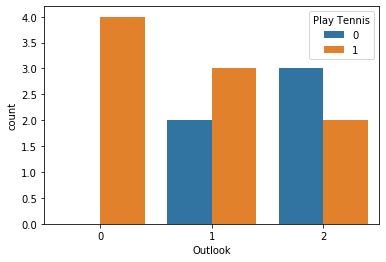

In [6]:
sns.countplot('Outlook',hue='Play Tennis',data=df)
plt.show()

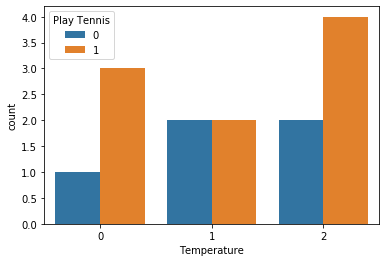

In [7]:
sns.countplot('Temperature',hue='Play Tennis',data=df)
plt.show()

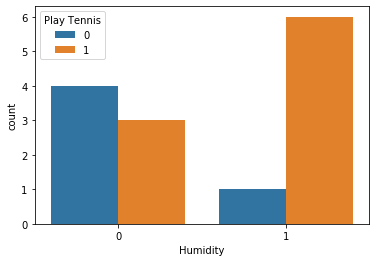

In [8]:
sns.countplot('Humidity',hue='Play Tennis',data=df)
plt.show()

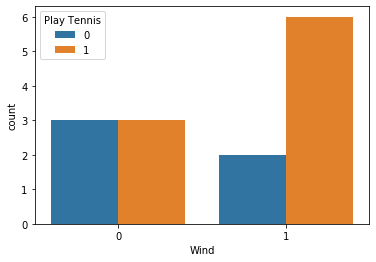

In [9]:
sns.countplot('Wind',hue='Play Tennis',data=df)
plt.show()

### 1.6 Split the data into train and test set:(70/30)

In [10]:
#Split data into train and test set(70:30)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [11]:
y_test

3     1
7     0
12    1
6     1
8     1
Name: Play Tennis, dtype: int32

### 1.7 Train a knn

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 1.8 Predict the model:

In [13]:
y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]

### 1.9 Evaluation the model:(classification_report)

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
print('Accuracy with KNN:',accuracy_score(y_test,y_pred))
print('Classification report:','\n',classification_report(y_test,y_pred))
print('Confusion matrix:','\n',confusion_matrix(y_test,y_pred))
print('AUC score:',roc_auc_score(y_test,y_prob))

Accuracy with KNN: 0.8
Classification report: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

   micro avg       0.80      0.80      0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

Confusion matrix: 
 [[1 0]
 [1 3]]
AUC score: 0.875


# Case-study 2 -pima-indians-diabetes (Naive Bayes classifier)

## To predict if given person is a diabetic or not from given health indicators

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [15]:
diabetes=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\In Class\\Day 3\\pima-indians-diabetes.data')
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [16]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
diabetes.columns=col_names
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### 2.2 Find out the feature columns

In [17]:
feature_columns=pd.DataFrame(diabetes.drop('label',axis=1))
feature_columns.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')

In [18]:
diabetes.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

### 2.3 Extract the independent variable X and dependent variable Y?

In [19]:
X=diabetes.drop('label',axis=1)
y=diabetes['label']

### 2.4 Split the data into train and test set:(70/30)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

### 2.5 Train a GaussianNB?

In [21]:
from sklearn.naive_bayes import GaussianNB
model_NB=GaussianNB()
model_NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.6 Predict the model:

In [22]:
y_pred_test=model_NB.predict(X_test)
y_prob_test=model_NB.predict_proba(X_test)

### 2.7 Evaluation the model:(classification_report)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score
print('Classification report:',classification_report(y_test,y_pred_test))

Classification report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83       149
           1       0.70      0.60      0.64        82

   micro avg       0.77      0.77      0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



### 2.8 Conclusion:



In [24]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))

accuracy score: 0.7662337662337663


### 2.9 Confusion matrix

In [25]:
# this produces a 2x2 numpy array (matrix)
print('Confusion matrix:','\n',confusion_matrix(y_test,y_pred_test))

Confusion matrix: 
 [[128  21]
 [ 33  49]]


### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): 

True Negatives (TN):

False Positives (FP): 

* Falsely predict positive

Type I error

False Negatives (FN): 


* Falsely predict negative

Type II error

0: negative class

1: positive class

In [26]:
confusion=confusion_matrix(y_test,y_pred_test)
TP=confusion[1,1]
FP=confusion[0,1]
TN=confusion[0,0]
FN=confusion[1,0]
total=TP+TN+FP+FN
print('True Positives:',TP)
print('True Negatives:',TN)
print('False Positives:',FP)
print('False Negatives:',FN)
print('Total:',total)

True Positives: 49
True Negatives: 128
False Positives: 21
False Negatives: 33
Total: 231


### 2.11 print the first 25 true and predicted responses

### 2.12 save confusion matrix and slice into four pieces

In [27]:
confusion=confusion_matrix(y_test,y_pred_test)
TP=confusion[1,1]
FP=confusion[0,1]
TN=confusion[0,0]
FN=confusion[1,0]
total=TP+TN+FP+FN
print('True Positives:',TP)
print('True Negatives:',TN)
print('False Positives:',FP)
print('False Negatives:',FN)
print('Total:',total)

True Positives: 49
True Negatives: 128
False Positives: 21
False Negatives: 33
Total: 231


### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [28]:
print('Accuracy score:',(TN+TP)/total)

Accuracy score: 0.7662337662337663


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [29]:
print('Error:',(FP+FN)/total)

Error: 0.23376623376623376


Sensitivity: When the actual value is positive, how often is the prediction correct?



In [30]:
print('Sensitivity:',TP/(TP+FN))

Sensitivity: 0.5975609756097561


Specificity: When the actual value is negative, how often is the prediction correct?



In [31]:
print('Specificity:',TN/(TN+FP))

Specificity: 0.8590604026845637


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [32]:
print('False Positive rate:',FP/(TN+FP))

False Positive rate: 0.14093959731543623


Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [33]:
print('Precision:',TP/(TP+FP))

Precision: 0.7


### 2.14 Adjusting the classification threshold?

#### print the first 10 predicted responses?

In [34]:
y_pred_test[0:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

#### print the first 10 predicted probabilities of class membership

In [35]:
y_prob_test[0:10]

array([[9.86416928e-01, 1.35830723e-02],
       [9.68331858e-01, 3.16681425e-02],
       [8.62779048e-01, 1.37220952e-01],
       [3.28530994e-03, 9.96714690e-01],
       [4.71083729e-01, 5.28916271e-01],
       [3.05982580e-01, 6.94017420e-01],
       [4.30371838e-01, 5.69628162e-01],
       [6.35683623e-01, 3.64316377e-01],
       [9.78395273e-01, 2.16047270e-02],
       [2.50183154e-11, 1.00000000e+00]])

#### print the first 10 predicted probabilities for class 1

In [36]:
model_NB.predict_proba(X_test)[:,1][0:10]

array([0.01358307, 0.03166814, 0.13722095, 0.99671469, 0.52891627,
       0.69401742, 0.56962816, 0.36431638, 0.02160473, 1.        ])

#### store the predicted probabilities for class 1

In [37]:
y_prob_class1=model_NB.predict_proba(X_test)[:,1]

#### plot histogram of predicted probabilities

#### create 8 bins

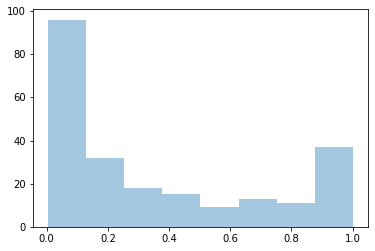

In [38]:
sns.distplot(y_prob_class1,hist=True,kde=False,bins=8)
plt.show()

### print the first 10 predicted probabilities

In [39]:
for i in range(y_prob_class1.size):
    print(y_prob_class1[i],y_pred_test[i])

0.013583072270786355 0
0.03166814246900808 0
0.13722095227875725 0
0.9967146900569294 1
0.5289162706788831 1
0.6940174199373047 1
0.5696281621639768 1
0.36431637660741517 0
0.021604727036689773 0
0.9999999999749818 1
0.753017054907661 1
0.3809024983941122 0
0.07424645910945969 0
0.15202842138679984 0
0.12620067560301856 0
0.0493614667603053 0
0.6944179047654201 1
0.20268982819899034 0
0.04841677767966031 0
0.8779027753803879 1
0.99724270940405 1
0.12086487544965867 0
0.042231644542932184 0
0.9075373697115335 1
0.027192617205349084 0
0.9997445881807943 1
0.36903122237995756 0
0.33252105226860856 0
0.1244590016513456 0
0.013294362902965496 0
0.9472653452954832 1
0.06154152206868571 0
0.6101454979276938 1
0.7054016703302185 1
0.9750012723997251 1
0.4058655948130574 0
0.09309688544669703 0
0.014245257935678124 0
0.1801458455472607 0
0.970704023026371 1
0.03175202865876024 0
0.5491413199324295 1
0.5540293507494108 1
0.04485424094591181 0
0.005564629656919351 0
0.08049444847696276 0
0.109951

In [40]:
y_pred_adj=y_pred_test
for i in range(y_prob_class1.size):
    if(y_prob_class1[i]>0.3):
        y_pred_adj[i]=1
    else:
         y_pred_adj[i]=0

### create new confusion matrix 

In [41]:
print('New confusion matrix:','\n',confusion_matrix(y_test,y_pred_adj))

New confusion matrix: 
 [[113  36]
 [ 23  59]]


### 2.14 Receiver Operating Characteristic (ROC) Curves

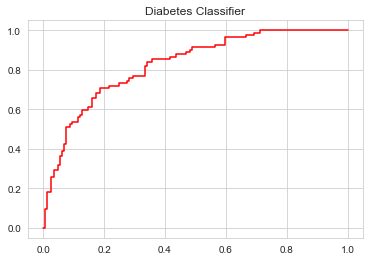

In [43]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_prob_class1)
sns.set_style('whitegrid')
plt.plot(fpr,tpr,'r')
plt.title('Diabetes Classifier')
plt.show()

#### define a function that accepts a threshold and prints sensitivity and specificity

In [44]:
def eval_threshold(threshold):
    print('Sensitivity:',tpr[thresholds>threshold][-1])
    print('Specificity:',1-fpr[thresholds>threshold][-1])

In [45]:
eval_threshold(0.5)

Sensitivity: 0.5975609756097561
Specificity: 0.87248322147651


In [46]:
eval_threshold(0.4)

Sensitivity: 0.6829268292682927
Specificity: 0.8120805369127517


In [47]:
eval_threshold(0.3)

Sensitivity: 0.7195121951219512
Specificity: 0.785234899328859


# 3. What is advantages Confusion matrix and ROC/AUC?

Confusion Matrix gives an overall idea about the how good our model is in predicting the outcome, in the form of TP,TN,FP and FN. Using these metrics, we can calculate metrics such as accuracy,precision,recall etc. so as to decide the strategy to improve our model in different business scenarios.

ROC/AUC- it is a metric which is not affected by the threshold value. It gives an aggregate representation of how good is our model in separating between the classes. We can see values of TPR and FPR at different thresholds and decide the threshold which best suits our purpose.